In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Load the Iris dataset
data=pd.read_csv('/content/IRIS.csv')

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['species']=le.fit_transform(data['species'])

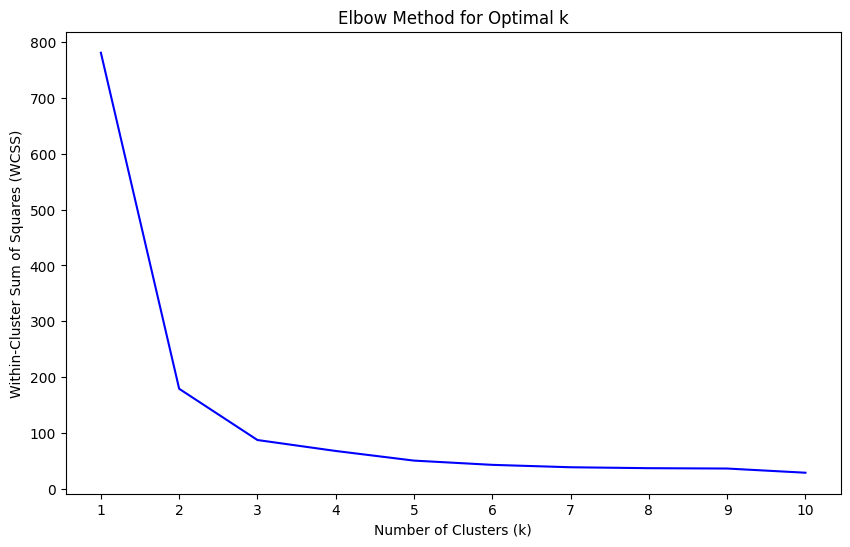

In [ ]:
# Calculate WCSS for different numbers of clusters
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS (Elbow method)
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(False)
plt.show()


In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [ ]:
import numpy as np

# Get cluster labels for each data point
labels = kmeans.labels_.flatten()

In [ ]:
centers = np.uint8(kmeans.cluster_centers_)

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data['Cluster'] = labels

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

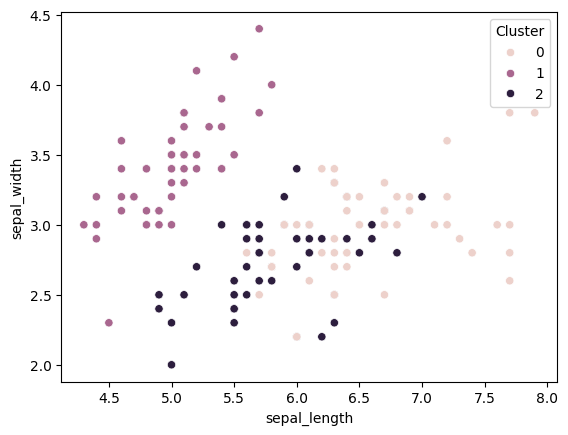

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='Cluster', data=data, color='virdis')

In [ ]:
data.Cluster.unique()

array([1, 2, 0], dtype=int32)

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(data.species,data.Cluster)
print(f'Accuracy is {acc*100}%')

Accuracy is 0.6666666666666667%


In [ ]:
from sklearn.metrics import silhouette_score
sil=silhouette_score(data,labels)
print(f'Silhouette score is {sil*100}%')

Silhouette score is 68.60961012515051%


In [ ]:
from sklearn.metrics import mutual_info_score
mutual_info_score(data.species,data.Cluster)
print(f'Mutual information score is {mutual_info_score(data.species,data.Cluster)*100}%')

Mutual information score is 103.32528798149548%
